In [284]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV #hyper parameter tuning: 
from sklearn.preprocessing import StandardScaler

In [286]:
iris= load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [288]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for plotting
y = iris.target

In [290]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [292]:
svm=SVC(kernel='linear',random_state=42)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [294]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.00%


In [296]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

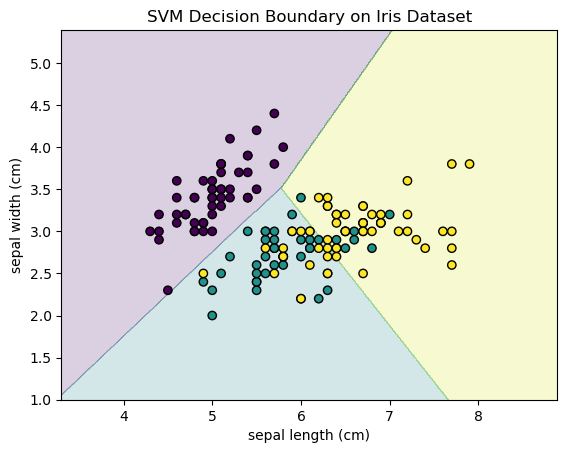

In [298]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter (X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary on Iris Dataset')
plt.show()

In [299]:
g=pd.read_csv("hotel_bookings_clean - hotel_bookings_clean.csv", sep=",") #groupby
g

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,68,14,2,3,2,0,0,1,130.9,0,1,0,0,0,1
1,0,152,14,1,4,1,0,0,0,42.0,1,0,0,0,0,1
2,0,11,49,0,3,1,0,0,0,36.0,1,0,0,0,0,1
3,1,6,27,0,1,2,0,0,0,139.0,0,1,0,0,1,0
4,1,335,38,0,1,2,0,1,0,85.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,31,16,0,1,2,0,0,0,94.5,0,1,0,0,1,0
1496,0,84,37,0,1,1,1,1,0,65.0,1,0,0,0,1,0
1497,1,315,49,0,2,2,0,0,0,52.0,0,1,0,0,1,0
1498,0,105,1,1,2,2,0,0,0,29.0,0,1,0,0,1,0


In [300]:
#hyper perameters: the values we tell out model before training it


In [302]:
data = pd.read_csv("hotel_bookings_clean - hotel_bookings_clean.csv")

X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [308]:
svm_model = SVC()

In [324]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3, 4, 5],
    'coef0': [0.1, 0.5, 1, 5, 10]
}

In [326]:
random_search = RandomizedSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0.1, 0.5, 1, 5, 10],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy')

In [327]:
print("RandomizedSearchCV Results:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_}")

RandomizedSearchCV Results:
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 1, 'C': 10}
Best Accuracy: 0.7508333333333332


In [328]:
best_svm = random_search.best_estimator_

In [329]:
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

In [330]:
accuracy = accuracy_score(y_test, y_pred)

In [331]:
print("\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification mReport:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


SVM Model Evaluation:
Accuracy: 0.7633333333333333
Classification mReport:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       188
           1       0.77      0.52      0.62       112

    accuracy                           0.76       300
   macro avg       0.77      0.71      0.72       300
weighted avg       0.76      0.76      0.75       300

Confusion Matrix:
[[171  17]
 [ 54  58]]
